In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import call_option_bsm_formula, call_option_payoff, call_option_delta, call_option_gamma, historical_vol, resample_underlying_simulation, N
from src.simulation import simulate_gbm, simulate_bm

In [208]:
DAYS_IN_A_YEAR = 360
# number of simulated post prices per day
# assume one every minute
SIMULATION_FREQUENCY = 1
# number of re-hedging steps per day
HEDGING_FREQUENCY = SIMULATION_FREQUENCY

SIMULATION_STEPS_IN_A_YEAR = DAYS_IN_A_YEAR*SIMULATION_FREQUENCY
HEDGING_STEPS_IN_A_YEAR = int(DAYS_IN_A_YEAR*HEDGING_FREQUENCY)

delta_t = SIMULATION_FREQUENCY/HEDGING_FREQUENCY
 
T_years = 1
S_0 = 100
K = S_0
sigma = 0.2
t = np.arange(SIMULATION_STEPS_IN_A_YEAR)/(SIMULATION_STEPS_IN_A_YEAR - 1)
# need to update hedging code to take into account interest rates
# also delta code
r = 0
mu = 0.1

In [209]:
SIMULATION_STEPS_IN_A_YEAR*T_years

360

In [296]:
sim_gbm = S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, mu = r, sigma = sigma, size = 50000)

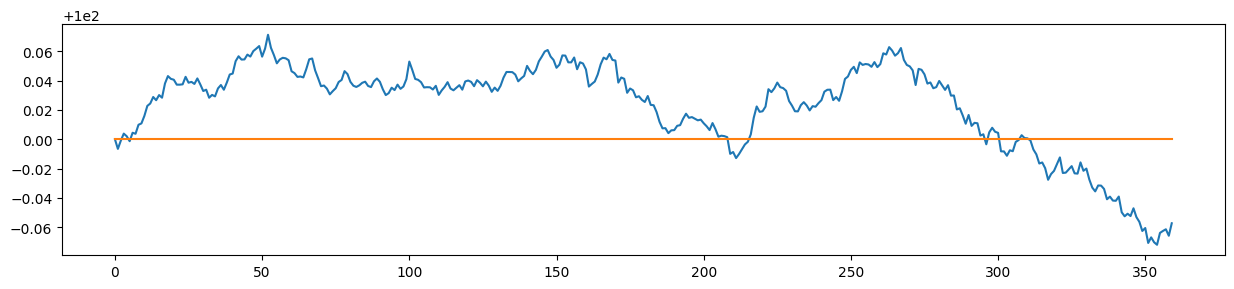

In [214]:
f, ax = plt.subplots(figsize = (15, 3))
ax.plot(sim_gbm.mean(axis =1))
ax.plot(S_0*np.exp(r*np.arange(SIMULATION_STEPS_IN_A_YEAR)/SIMULATION_STEPS_IN_A_YEAR))

In [297]:
(sim_gbm[-1, :] > 100).mean()

0.46076

In [231]:
(r + .5*(sigma**2))*T_years

0.020000000000000004

In [294]:
(S_0*np.exp(
    (r - .5*(sigma**2))*T_years + 
    sigma*np.random.normal(size=50000)
) > 100).mean()

0.461

In [293]:
N(
    (-np.log(K) + np.log(S_0) + (r + .5*(sigma**2)))/
    (sigma*np.sqrt(T_years))
)

0.539827837277029

In [ ]:
# something is wrong with the simulated gmb

In [101]:
call_option_delta(
    S = S_0, 
    K = S_0,
    T = T_years,
    t = 0,
    r = 0,
    sigma=sigma
)

0.539827837277029

In [103]:
call_option_payoff(110, 100)

0    10
dtype: int64

In [104]:
simulate_gbm?

Signature: simulate_gbm(T, n_steps, mu, sigma, size)
Docstring: <no docstring>
File:      ~/projects/stochastic_volatility/src/simulation.py
Type:      function


In [136]:
simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, 0, sigma, 1)

array([[1.        ],
       [0.99836419],
       [0.99800593],
       ...,
       [1.15915878],
       [1.15284845],
       [1.15348137]])

In [287]:
(S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, r + .5*(sigma**2), sigma, 10000)[-1, :] > K).mean()

0.4914

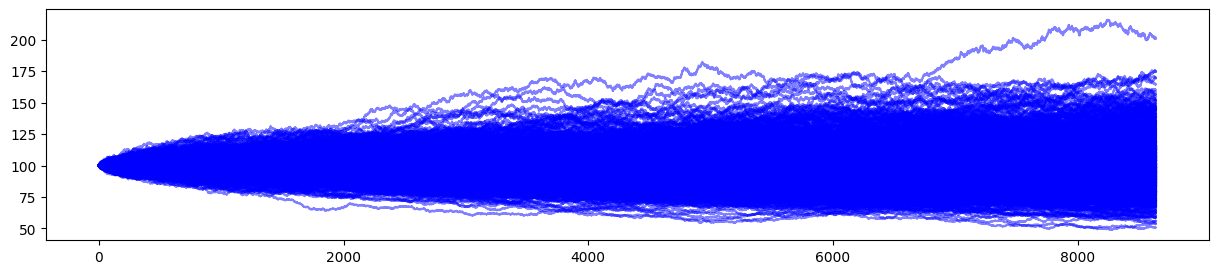

In [160]:
f, ax = plt.subplots(figsize = (15, 3))
sts = []
for _ in range(1000):
    s = S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, 0, sigma, 1)[:, 0]
    ax.plot(s, color = "blue", alpha = .5)
    sts.append(s[-1])

In [ ]:
sts

In [149]:
(pd.Series(payoffs) > 0).mean()

0.459

In [114]:
s = simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, 0, sigma, 1)
s

array([[1.        ],
       [1.00253786],
       [1.00304346],
       ...,
       [0.81890911],
       [0.81984884],
       [0.82057395]])

In [116]:
s[-1, 0]

0.8205739469820141

In [94]:
probas = []
step = 50
start = step
end = step*50+ step
sim_ns = np.arange(start, end, step)
for sim_n in sim_ns:
    payoffs = []
    for _ in range(sim_n):
        S_T = S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, 0, sigma, 1)[-1, 0]
        payoffs.append(call_option_payoff(S_T, K)[0])
    probas.append(1 - (pd.Series(payoffs) > 0).mean())

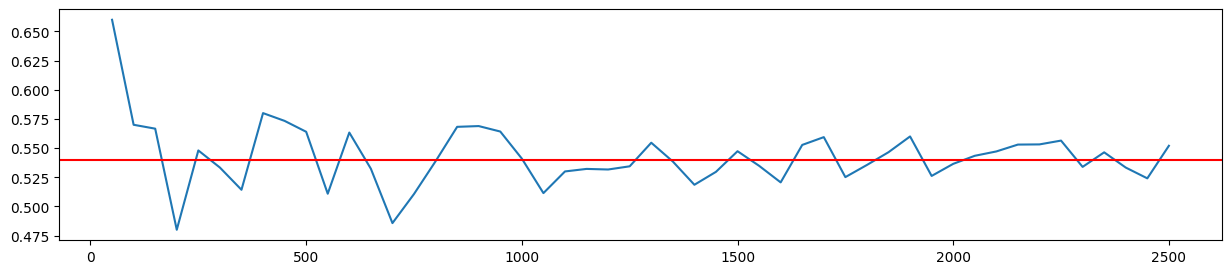

In [93]:
f, ax = plt.subplots(figsize = (15, 3))
ax.plot(sim_ns, probas)
ax.axhline(
    call_option_delta(
        S = S_0, 
        K = S_0,
        T = T_years,
        t = 0,
        r = 0,
        sigma=sigma
    ),
    color = "red"
)

117.48946866645507

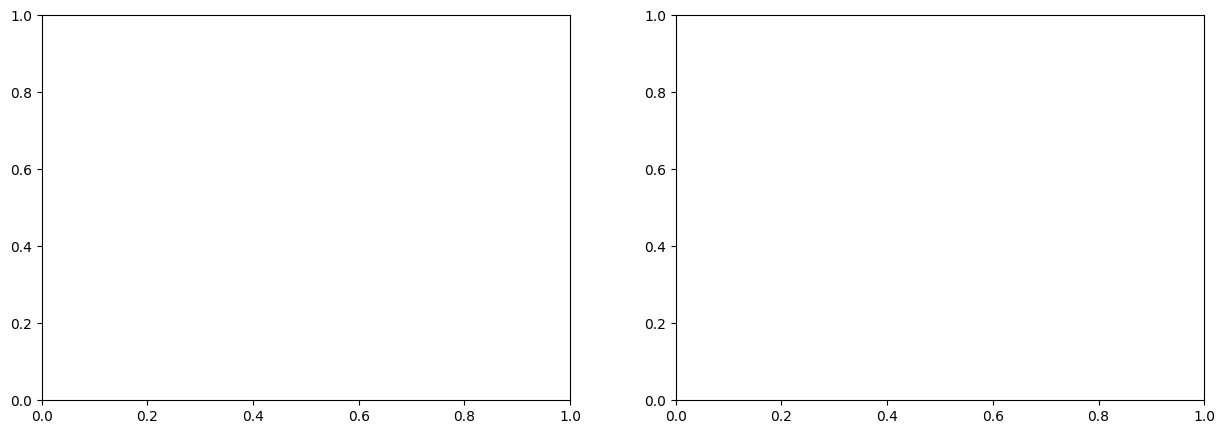

In [20]:
f, axs = plt.subplots(1, 2, figsize = (15, 5))
ax = axs[0]
final_results = []
pandl = []
for _ in range(500):
    S = S_0*simulate_gbm(T_years, SIMULATION_STEPS_IN_A_YEAR*T_years, mu, sigma, 1)[:, 0]